#  Air Passengers Canada-Time series Analysis

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import datetime as dt

## Dataset - ETL

In [2]:
# reading the dataset - occupancy of a train
df = pd.read_csv('cleaned_data.csv')

In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REF_DATE  349 non-null    object
 1   VALUE     349 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [4]:
df.shape

(349, 2)

In [7]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df

,REF_DATE,VALUE
0,1992-01,680993
1,1992-02,671596
2,1992-03,652172
3,1992-04,664448
4,1992-05,661396
...,...,...
344,2020-09,19912
345,2020-10,23712
346,2020-11,38109
347,2020-12,43029


In [9]:
print(df)

    REF_DATE   VALUE
0    1992-01  680993
1    1992-02  671596
2    1992-03  652172
3    1992-04  664448
4    1992-05  661396
..       ...     ...
344  2020-09   19912
345  2020-10   23712
346  2020-11   38109
347  2020-12   43029
348  2021-01   45643

[349 rows x 2 columns]


In [10]:
#changing column names 
df.columns = ['date','passengers'] # set column names
df.head() # preview of dataset

,date,passengers
0,1992-01,680993
1,1992-02,671596
2,1992-03,652172
3,1992-04,664448
4,1992-05,661396


In [11]:
df = df.set_index('date') # set date as index

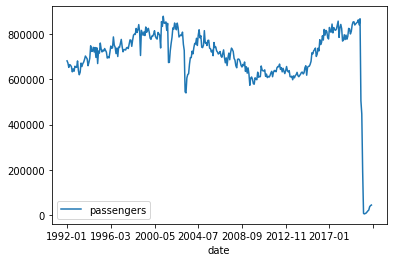

In [12]:
df.plot()

## Seasonal Decomposition


In [119]:
# import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import rcParams

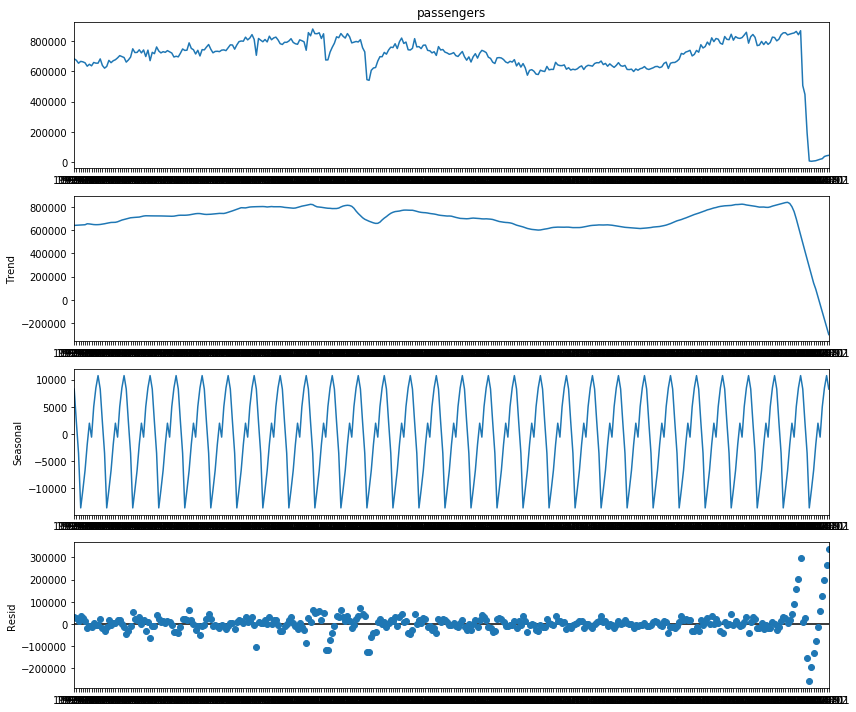

In [120]:
# additive seasonal decomposition
rcParams['figure.figsize']= 12,10
decomp_add = sm.tsa.seasonal_decompose(df['passengers'], model='additive', extrapolate_trend='freq', freq = 12)
fig = decomp_add.plot()
plt.show()

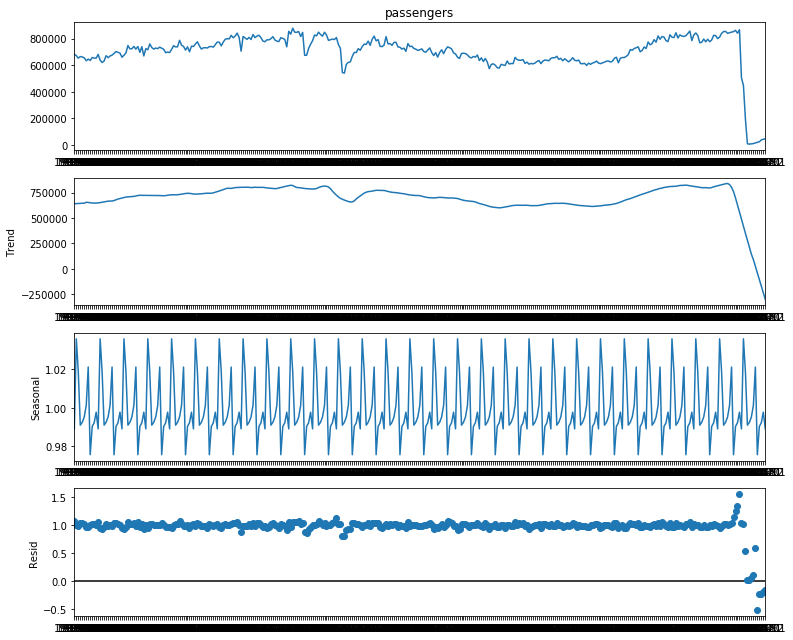

In [121]:
# multiplicative seasonal decomposition
rcParams['figure.figsize']= 11,9
decomp_mul = sm.tsa.seasonal_decompose(df['passengers'], model='multiplicative', extrapolate_trend='freq', freq = 12)
fig = decomp_mul.plot()
plt.show()

In [122]:
# dataframe containing all the seasonal components - additive
pd.concat([decomp_add.seasonal, decomp_add.trend, decomp_add.resid, decomp_add.observed], axis=1)

,seasonal,trend,resid,passengers
date,,,,
1992-01,8258.703801,641109.531857,31624.764342,680993.0
1992-02,2163.546507,642227.220814,27205.232679,671596.0
1992-03,-3531.732997,643344.909771,12358.823227,652172.0
1992-04,-13588.485203,644462.598728,33573.886475,664448.0
1992-05,-10274.843730,645580.287685,26090.556046,661396.0
...,...,...,...,...
2020-09,-574.240660,-40057.534674,60543.775334,19912.0
2020-10,5009.648848,-105270.205420,123972.556571,23712.0
2020-11,8477.601575,-170482.876166,200114.274590,38109.0


In [18]:
# dataframe containing all the seasonal components - multiplicative
pd.concat([decomp_mul.seasonal, decomp_mul.trend, decomp_mul.resid, decomp_mul.observed], axis=1)

,seasonal,trend,resid,occupancy
date,,,,
1992-01,0.989072,641109.531857,1.073947,680993.0
1992-02,1.035605,642227.220814,1.009776,671596.0
1992-03,1.018462,643344.909771,0.995344,652172.0
1992-04,0.990988,644462.598728,1.040387,664448.0
1992-05,0.992471,645580.287685,1.032271,661396.0
...,...,...,...,...
2020-09,0.975728,-40057.534674,-0.509450,19912.0
2020-10,0.990306,-105270.205420,-0.227454,23712.0
2020-11,0.992241,-170482.876166,-0.225284,38109.0


By observing the dataframe, we can say that the data doesnt have a steady trend associated. It is also of type 'additive'

## Time Series Forecasting

### Moving Average

In [13]:
df_ma = df.copy() # make a copy of dataframe

In [14]:
# calculate moving averages with certain windows n = 4 to 12
for i in range(4,12,2):
    colName = 'SMA_{0}'
    df_ma[colName.format(i)] = df_ma.passengers.rolling(i, min_periods=1).mean()


In [16]:
df_ma.head(5) # dataframe preview

,passengers,SMA_4,SMA_6,SMA_8,SMA_10
date,,,,,
1992-01,680993,680993.000000,680993.000000,680993.000000,680993.000000
1992-02,671596,676294.500000,676294.500000,676294.500000,676294.500000
1992-03,652172,668253.666667,668253.666667,668253.666667,668253.666667
1992-04,664448,667302.250000,667302.250000,667302.250000,667302.250000
1992-05,661396,662403.000000,666121.000000,666121.000000,666121.000000


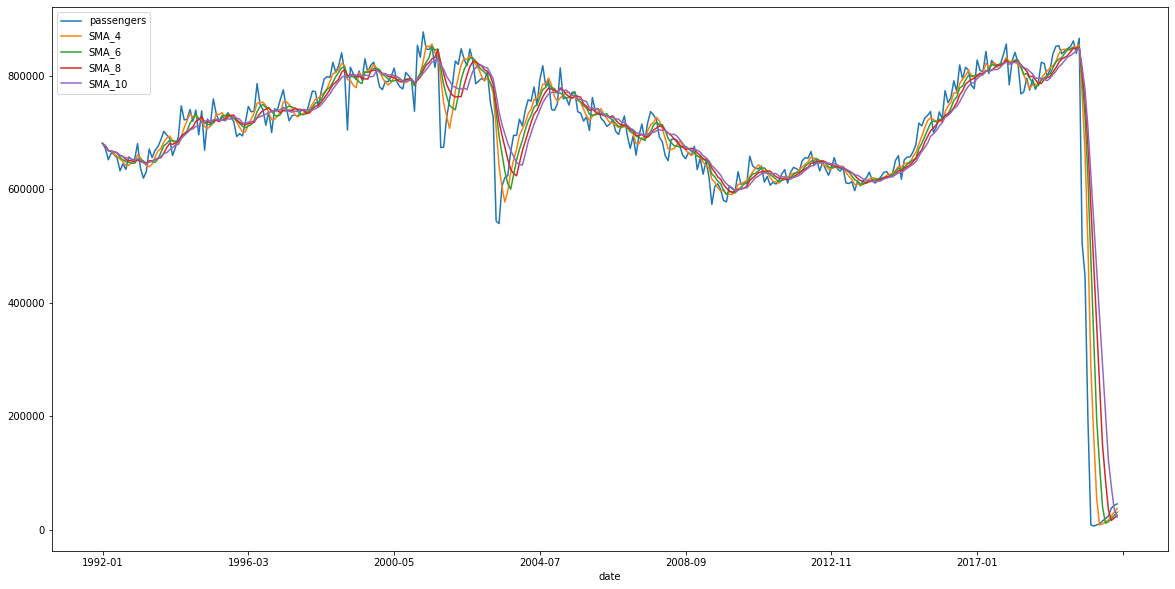

In [17]:
df_ma.plot(figsize=(20,10)) # plot various moving averages calculated alongside original

In [18]:
#calculating mean absolute percentage (MAPE)
#MAPE can be used as an indicator of accuracy
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
#calculate error factor
df_ma['Err_4']=df_ma['passengers']-df_ma['SMA_4']
df_ma

,passengers,SMA_4,SMA_6,SMA_8,SMA_10,Err_4
date,,,,,,
1992-01,680993,680993.000000,680993.000000,680993.000000,680993.000000,0.000000
1992-02,671596,676294.500000,676294.500000,676294.500000,676294.500000,-4698.500000
1992-03,652172,668253.666667,668253.666667,668253.666667,668253.666667,-16081.666667
1992-04,664448,667302.250000,667302.250000,667302.250000,667302.250000,-2854.250000
1992-05,661396,662403.000000,666121.000000,666121.000000,666121.000000,-1007.000000
...,...,...,...,...,...,...
2020-09,19912,13604.500000,11583.833333,88741.500000,208145.200000,6307.500000
2020-10,23712,17373.500000,14104.833333,35832.750000,123882.700000,6338.500000
2020-11,38109,24289.750000,19373.166667,16415.500000,77175.300000,13819.250000


In [20]:
#calculate MAE, RMSE and MSE for MA 4
MAE = df_ma["Err_4"].abs().mean()  
print("MAE:",round(MAE,2)) 


RMSE = np.sqrt((df_ma["Err_4"]**2).mean())
print("RMSE:",round(RMSE,2))


MSE= (df_ma["Err_4"]**2).mean()
print("MSE:",round(MSE,2))


print("MAPE:",mean_absolute_percentage_error(df_ma['passengers'],df_ma['SMA_4']))

MAE: 18706.59
RMSE: 37675.44
MSE: 1419438509.5
MAPE: 21.191337905932617


### Exponential Smoothing

In [21]:
df.head(5) # preview of dataframe

,passengers
date,
1992-01,680993
1992-02,671596
1992-03,652172
1992-04,664448
1992-05,661396


In [23]:
#using dicky-fuller test to determine if data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['passengers'])
print(result)

(-2.1820562368409804, 0.21282234269708145, 3, 345, {'1%': -3.4494474563375737, '5%': -2.8699542285903887, '10%': -2.5712527305187987}, 7924.037934236731)


In [24]:
df_diff = df.diff(1).dropna() #shifting data based on seasonality breakdown

In [25]:
df_diff.head(5) # preview of dataframe

,passengers
date,
1992-02,-9397.0
1992-03,-19424.0
1992-04,12276.0
1992-05,-3052.0
1992-06,-6391.0


In [26]:
#using dicky-fuller test to determine if data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff['passengers'])
print(result)

(-10.435942235750339, 1.5663794560742234e-18, 1, 346, {'1%': -3.4493918438232525, '5%': -2.8699298018856574, '10%': -2.5712397066390458}, 7903.631635670445)


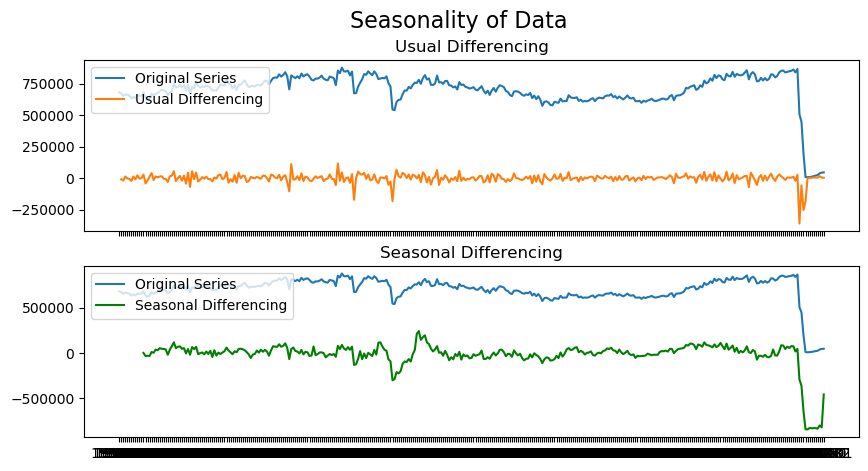

In [29]:
# Plot for comparing seasonal and usual differencing
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

plt.suptitle('Seasonality of Data', fontsize=16)
plt.show()

In [30]:
len(df_diff.index)

348

In [31]:
#splitting the data into test and train splits in the ratio of 80:20
train=df_diff[0:-30] 
test=df_diff[-30:]
print(train.shape)
print(test.shape)

(318, 1)
(30, 1)


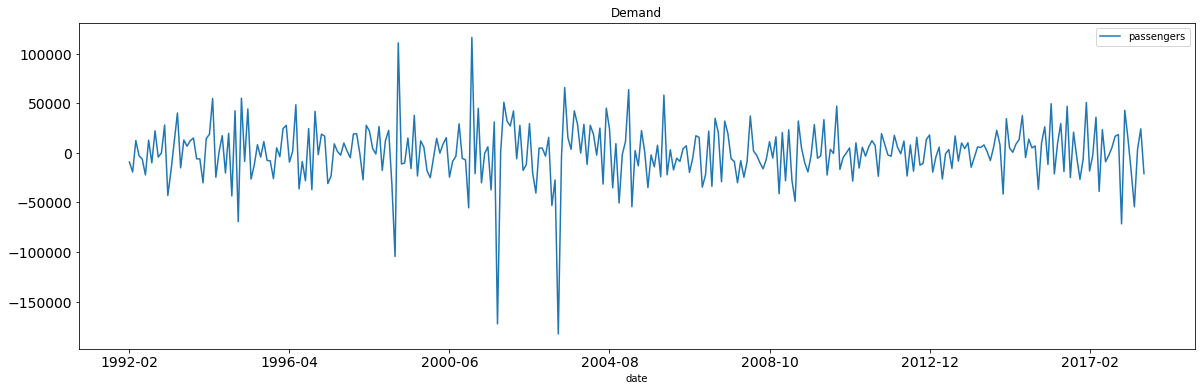

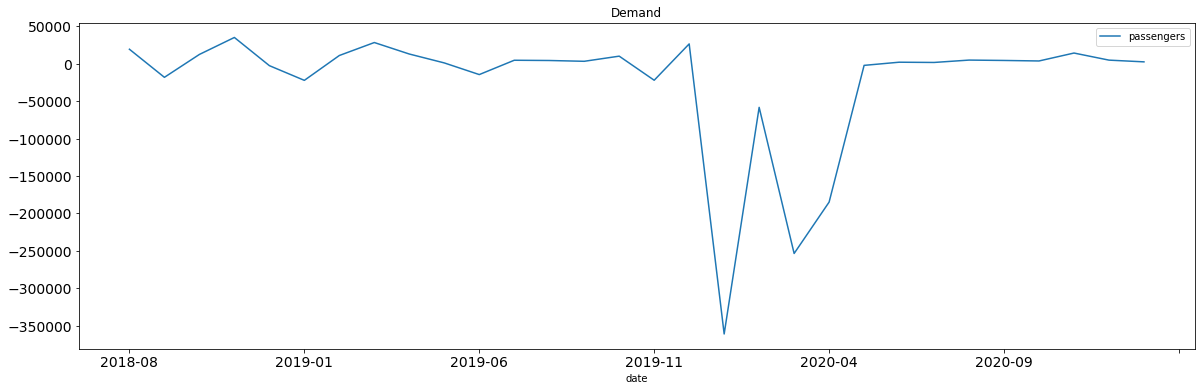

In [32]:
# plot test and train sets
train.plot(figsize=(20,6), title= 'Demand', fontsize=14)
test.plot(figsize=(20,6), title= 'Demand', fontsize=14)
plt.show()

In [33]:
# import required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [34]:
# Fit the model - triple exponential smoothing using additive seasonality.
pred = test.copy()
# Modelling using train data
fit_tes = ExponentialSmoothing(np.asarray(train),seasonal_periods=12 ,trend='add', seasonal='add').fit()
# Forecasting using test data
pred['Holt_Winter'] = fit_tes.forecast(len(test))
# Calculate KPI's

C:\Users\gowth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\gowth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\gowth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


MAE 40,842.29
MSE 7,846,052,008.15
RMSE 88,577.94
MAPE: 156.09594801980694


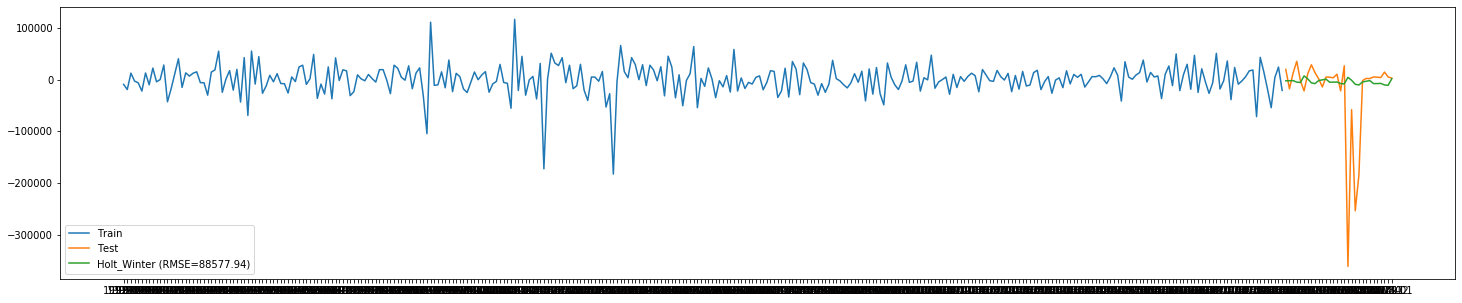

In [36]:
# calculate evaluation metrics for measuring performance
mae = mean_absolute_error(test.passengers, pred.Holt_Winter)

mse=mean_squared_error(test.passengers, pred.Holt_Winter)

rmse = sqrt(mean_squared_error(test.passengers, pred.Holt_Winter))

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
print("MAPE:",mean_absolute_percentage_error(test.passengers,pred.Holt_Winter))

# Plotting actual(test, train) and predicted data

plt.figure(figsize=(25,5))
plt.plot( train['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

### ARIMA

In [37]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

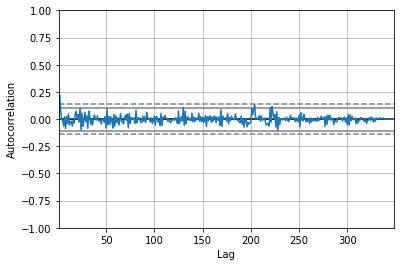

In [39]:
# plotting the autocorrelation function using the modified data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_diff.passengers)
plt.show()

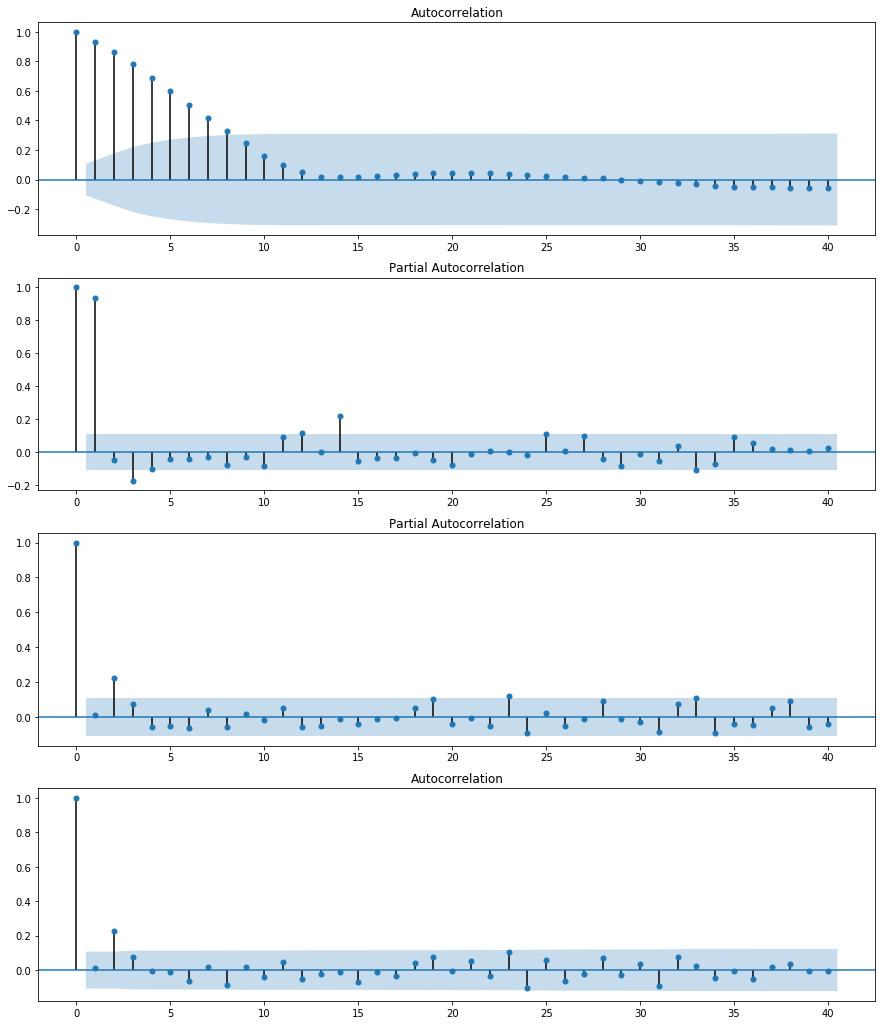

In [40]:
# plotting ACF and PACF plots till 40 lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15,18))
ax1 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(df['passengers'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(df['passengers'].iloc[13:],lags=40,ax=ax2)
ax3 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_pacf(df_diff['passengers'].iloc[13:],lags=40,ax=ax3)
ax4 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_acf(df_diff['passengers'].iloc[13:],lags=40,ax=ax4)

In [41]:
# Using auto arima for identifying the ideal hyperparameters - p, q and d
import pmdarima as pm

smodel = pm.auto_arima(df.passengers, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=8303.096, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9020.407, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=8348.109, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8799.717, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9024.529, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=8426.379, Time=0.25 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=8300.303, Time=0.81 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=8349.329, Time=0.45 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=8298.070, Time=1.71 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=8316.064, Time=1.01 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=8298.510, Time=2.11 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=8803.406, Time=1.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=8296.885, Time=1.16 sec
 ARIMA(1,0,0)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  349
Model:             SARIMAX(1, 0, 0)x(2, 1, [1], 12)   Log Likelihood               -4140.595
Date:                              Wed, 14 Apr 2021   AIC                           8291.191
Time:                                      21:21:03   BIC                           8310.291
Sample:                                           0   HQIC                          8298.804
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9662      0.009    107.511      0.000       0.949       0.984
ar.S.L12      -0.1375      0.041     -3.319      0.001      -0.219      -0.056
ar.S.L24      -0.1486      0.034     -4.337      0.000      -0.216      -0.081
ma.S.L12      -0.8082      0.053    -15.171      0.000      -0.913      -0.704
sigma2      2.847e+09    8.7e-12   3.27e+20      0.000    2.85e+09    2.85e+09
===================================================================================
Ljung-Box (Q):                       68.70   Jarque-Bera (JB):              6004.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -3.54
Prob(H) (two-sided):                  0.01   Kurtosis:                        22.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.9e+35. Standard errors may be unstable.
"""

In [42]:
#importing SARIMAX libraries for implementing seasonal ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the model using ideal hyperparameters - (0,1,1)(0,1,2)[12]  
model = SARIMAX(df, order=(0, 1, 1), seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
# Fitting the model
model_fit = model.fit()
# Model summary
model_fit.summary()

C:\Users\gowth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\gowth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              passengers   No. Observations:                  349
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -3766.348
Date:                                 Wed, 14 Apr 2021   AIC                           7540.697
Time:                                         21:21:34   BIC                           7555.643
Sample:                                     01-01-1992   HQIC                          7546.671
                                          - 01-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0282      0.045     -0.629      0.529      -0.116       0.060
ma.S.L12      -0.8370      0.074    -11.271      0.000      -0.983      -0.691
ma.S.L24       0.1974      0.064      3.089      0.002       0.072       0.323
sigma2      2.904e+09   3.05e-11   9.51e+19      0.000     2.9e+09     2.9e+09
===================================================================================
Ljung-Box (Q):                       60.14   Jarque-Bera (JB):              6575.71
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -3.13
Prob(H) (two-sided):                  0.06   Kurtosis:                        24.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.67e+35. Standard errors may be unstable.
"""

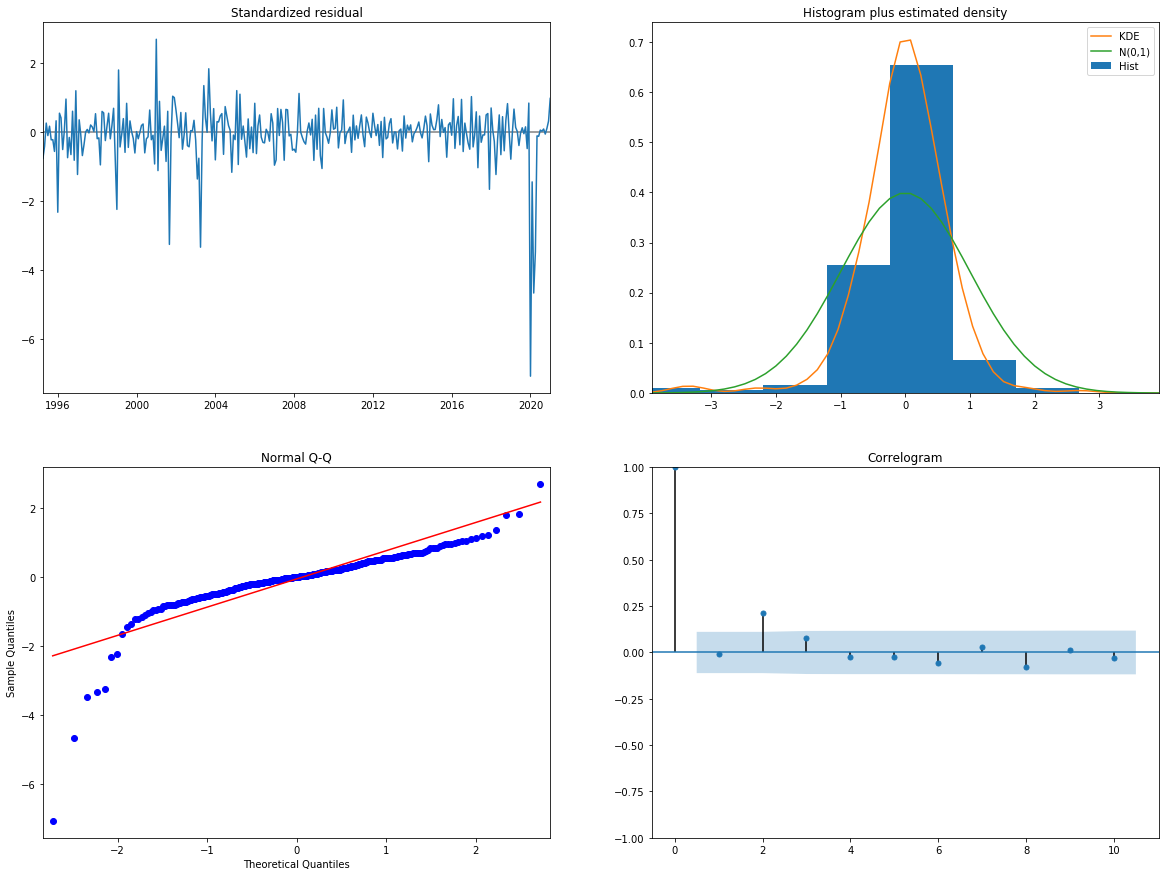

In [43]:
# Create the 4 diagostics plots
model_fit.plot_diagnostics(figsize=(20,15))
plt.show()

### One step Forecast

In [45]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-1)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower passengers']
upper_limits = confidence_intervals.loc[:,'upper passengers']

# Print best estimate predictions
print(mean_forecast)

2021-01-01   -6895.335127
Freq: MS, dtype: float64


In [48]:
''''# plot the  data
#fig = plt.figure((0,1,1)(0,1,2)[12])
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()'''

"'# plot the  data\n#fig = plt.figure((0,1,1)(0,1,2)[12])\nplt.plot(df.index, df, label='observed')\n\n# plot your mean predictions\nplt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')\n\n# shade the area between your confidence limits\nplt.fill_between(lower_limits.index, lower_limits, \n               upper_limits, color='pink')\n\n# set labels, legends and show plot\nplt.xlabel('Date')\nplt.ylabel('Occupancy')\nplt.legend()\nplt.show()"

### General Dynamic Prediction

In [46]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower passengers']
upper_limits = confidence_intervals.loc[:,'upper passengers']

# Print best estimate predictions
print(mean_forecast)

2020-02-01    524802.478465
2020-03-01    520396.984421
2020-04-01    515328.725905
2020-05-01    514005.934164
2020-06-01    522576.636884
2020-07-01    521147.657659
2020-08-01    524914.748966
2020-09-01    524700.255211
2020-10-01    531801.105194
2020-11-01    540268.220244
2020-12-01    528193.899392
2021-01-01    478753.065496
Freq: MS, dtype: float64


In [51]:
'''# plot the  data
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()'''

"# plot the  data\nfig = plt.figure(figsize=(20,5))\nplt.plot(df.index, df, label='observed')\n\n# plot your mean predictions\nplt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')\n\n# shade the area between your confidence limits\nplt.fill_between(lower_limits.index, lower_limits, \n               upper_limits, color='pink')\n\n# set labels, legends and show plot\nplt.xlabel('Date')\nplt.ylabel('Occupancy')\nplt.legend()\nplt.show()"

### out of sample

In [47]:
forecast = model_fit.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower passengers']
upper_limits = confidence_intervals.loc[:,'upper passengers']

# Print best estimate predictions
print(mean_forecast)

2021-02-01     42712.223961
2021-03-01      4753.010512
2021-04-01    -28412.515770
2021-05-01    -29706.795363
2021-06-01    -26340.988397
2021-07-01    -27463.100338
2021-08-01    -22177.626364
2021-09-01    -22177.178713
2021-10-01    -13998.175285
2021-11-01     -9699.707917
2021-12-01     -9935.360573
2022-01-01   -126379.221219
Freq: MS, dtype: float64


In [48]:
'''# plot the  data
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()'''

"# plot the  data\nfig = plt.figure(figsize=(20,5))\nplt.plot(df.index, df, label='observed')\n\n# plot your mean predictions\nplt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')\n\n# shade the area between your confidence limits\nplt.fill_between(lower_limits.index, lower_limits, \n               upper_limits, color='pink')\n\n# set labels, legends and show plot\nplt.xlabel('Date')\nplt.ylabel('Occupancy')\nplt.legend()\nplt.show()"

### Machine Learning

In [49]:
import math # importing libaries

In [50]:
df.head() # preview of dataset

,passengers
date,
1992-01,680993
1992-02,671596
1992-03,652172
1992-04,664448
1992-05,661396


#### Data Preparation

In [51]:
df_temp = pd.DataFrame() # create a temporary dataframe

In [52]:
for i in range(12,0,-1):
     df_temp[['t-'+str(i)]] = df.shift(i)  # Creating 12 lag values for predicting observations

In [53]:
df_temp['t'] = df.values

In [54]:
df_temp

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
1992-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680993
1992-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680993.0,671596
1992-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680993.0,671596.0,652172
1992-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680993.0,671596.0,652172.0,664448
1992-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680993.0,671596.0,652172.0,664448.0,661396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09,851485.0,861715.0,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912
2020-10,861715.0,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912.0,23712
2020-11,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912.0,23712.0,38109


In [55]:
df_ml = df_temp[12:]

In [56]:
df_ml

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
1993-01,680993.0,671596.0,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624
1993-02,671596.0,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601
1993-03,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690
1993-04,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690.0,631010
1993-05,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690.0,631010.0,671080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09,851485.0,861715.0,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912
2020-10,861715.0,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912.0,23712
2020-11,839747.0,866337.0,505183.0,446982.0,193447.0,8586.0,6499.0,8636.0,10444.0,15426.0,19912.0,23712.0,38109


In [57]:
df_ml.head(5)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
1993-01,680993.0,671596.0,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624
1993-02,671596.0,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601
1993-03,652172.0,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690
1993-04,664448.0,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690.0,631010
1993-05,661396.0,655005.0,632630.0,645263.0,635089.0,657180.0,652792.0,652631.0,680624.0,637601.0,619690.0,631010.0,671080


In [58]:
df_ml.isnull().sum()

t-12    0
t-11    0
t-10    0
t-9     0
t-8     0
t-7     0
t-6     0
t-5     0
t-4     0
t-3     0
t-2     0
t-1     0
t       0
dtype: int64

In [59]:
# splitting the data into feature and target variables
passenger = df_ml.values
X= passenger[:,0:-1]
y = passenger[:,-1]

In [60]:
# shape of data
print(X.shape)
print(y.shape)

(337, 12)
(337,)


#### Splitting in the ratio of 80-20


In [61]:
ratio = 0.8 # 80-20 ratio
Y = y
traintarget_size = int(len(Y) * ratio)   # Set split
print(traintarget_size)
train_target, test_target = Y[:traintarget_size], Y[traintarget_size:len(Y)]

269


In [62]:
# print observations - target
print('Observations for Target: %d' % (len(Y)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 337
Training Observations for Target: 269
Testing Observations for Target: 68


In [63]:
# print observations - feature
trainfeature_size = int(len(X) * ratio)
train_feature, test_feature = X[:trainfeature_size], X[trainfeature_size:len(X)]
print('Observations for feature: %d' % (len(X)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 337
Training Observations for feature: 269
Testing Observations for feature: 68


In [64]:
train_feature

array([[680993., 671596., 652172., ..., 657180., 652792., 652631.],
       [671596., 652172., 664448., ..., 652792., 652631., 680624.],
       [652172., 664448., 661396., ..., 652631., 680624., 637601.],
       ...,
       [616752., 622098., 629994., ..., 652024., 656839., 657304.],
       [622098., 629994., 631198., ..., 656839., 657304., 665931.],
       [629994., 631198., 623282., ..., 657304., 665931., 679205.]])

#### Decision Tree

In [65]:
# Decision Tree Modelling
from sklearn.tree import DecisionTreeRegressor

# Defining the model
decision_tree = DecisionTreeRegressor() # default parameters

# Fitting the model with train part of target and feature data
decision_tree.fit(train_feature, train_target)

# Printing the accuracy scores
print(decision_tree.score(train_feature, train_target))
print(decision_tree.score(test_feature,test_target))


1.0
0.3792651653076604


In [66]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.
score_df = []

for d in range(2,21):
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_feature, train_target)

    # Print out the scores on train and test
#     print('max_depth=', str(d))
    tr_score = decision_tree.score(train_feature, train_target)
    ts_score = decision_tree.score(test_feature, test_target)
    
    score_df.append({'depth':str(d), 'train_score': tr_score,  'test_score': ts_score})
    
# R-square for train and test scores are below.
print(pd.DataFrame(score_df).to_string(index=False))
# best max depth is d = 4

depth  train_score  test_score
    2     0.809315    0.281997
    3     0.849885    0.317697
    4     0.908002    0.306877
    5     0.935164    0.394053
    6     0.954105    0.291154
    7     0.968394    0.293092
    8     0.982875    0.278326
    9     0.992090    0.321128
   10     0.996003    0.282918
   11     0.998031    0.312248
   12     0.999476    0.287689
   13     0.999933    0.301379
   14     0.999993    0.349564
   15     0.999999    0.357172
   16     1.000000    0.392723
   17     1.000000    0.315879
   18     1.000000    0.356646
   19     1.000000    0.294657
   20     1.000000    0.395407


Tree on train set MAE%: 2.4
Tree on test set MAE%: 16.2


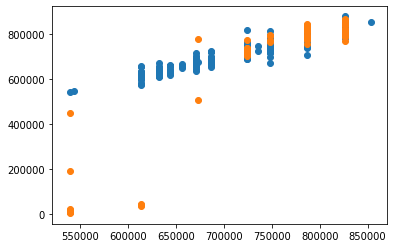

In [67]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree = DecisionTreeRegressor(max_depth=4) # Fill in best max depth score here
decision_tree.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree.predict(test_feature)
MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


RsquareScoreTrain = decision_tree.score(train_feature, train_target)
RsquareScoreTest = decision_tree.score(test_feature, test_target)
result={'Model':'Decision Tree (80|20)',
        'Rsquare Train':[RsquareScoreTrain],
        'R-square Test':[RsquareScoreTest],
        'MAE Train':[round(MAE_train*100,1)],
        'MAE Test':[round(MAE_test*100,1)]}

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

**Benchmark model(Linear regression model)**

In [68]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)


print('Train R-square:', reg.score(train_feature, train_target))
print('Test R-square:', reg.score(test_feature, test_target), '\n') 

# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


RsquareScoreTrain = reg.score(train_feature, train_target)
RsquareScoreTest = reg.score(test_feature, test_target)

result={'Model':'Benchmark- Linear Regression(80|20)','Rsquare Train':[RsquareScoreTrain],'R-square Test':[RsquareScoreTest],'MAE Train':[round(MAE_train*100,1)],'MAE Test':[round(MAE_test*100,1)]}
result_80= pd.DataFrame()
result_80=result_80.append(pd.DataFrame(result), ignore_index=True)

Train R-square: 0.846835008938761
Test R-square: 0.9274372647399726 

Tree on train set MAE%: 2.9
Tree on test set MAE%: 6.1


**RANDOM FOREST MODEL**

In [69]:
# Random Forest Model
print('==========================================================================================')
print('RANDOM FOREST MODEL')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create the random forest model and fit to the training data
rfr_reg = RandomForestRegressor(n_estimators=200)
rfr_reg.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print('Train R-square:', rfr_reg.score(train_feature, train_target))
print('Test R-square:', rfr_reg.score(test_feature, test_target))  # Try to attain a positive value

RANDOM FOREST MODEL
Train R-square: 0.971778284036744
Test R-square: 0.36077849913264637


In [70]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [20,30,50,100,150,200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [11,22]}


grid = {'n_estimators': [10,30,70,90], 'max_depth': [5], 'max_features': [9], 'random_state': [11]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_reg.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_reg.fit(train_feature, train_target)
    test_scores.append(rfr_reg.score(test_feature, test_target))
    print('grid:',g, ' Score:', rfr_reg.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print('The best hyperparameter:', test_scores[best_idx], ParameterGrid(grid)[best_idx])  
# The best hyperparameter: 0.73407562486015 {'random_state': 523, 'n_estimators': 20, 'max_features': 10, 'max_depth': 6}
# The best hyperparameter: 0.7383598563923621 {'random_state': 11, 'n_estimators': 30, 'max_features': 9, 'max_depth': 5}

grid: {'max_depth': 5, 'max_features': 9, 'n_estimators': 10, 'random_state': 11}  Score: 0.3435335967812376
grid: {'max_depth': 5, 'max_features': 9, 'n_estimators': 30, 'random_state': 11}  Score: 0.3555701407134324
grid: {'max_depth': 5, 'max_features': 9, 'n_estimators': 70, 'random_state': 11}  Score: 0.3438213494748663
grid: {'max_depth': 5, 'max_features': 9, 'n_estimators': 90, 'random_state': 11}  Score: 0.34380042310651904
The best hyperparameter: 0.3555701407134324 {'random_state': 11, 'n_estimators': 30, 'max_features': 9, 'max_depth': 5}


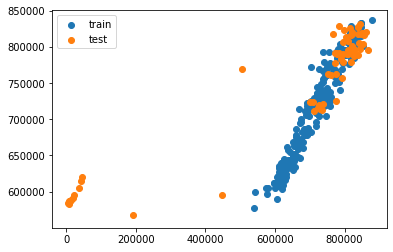

Tree on train set MAE%: 2.1
Tree on test set MAE%: 17.1


In [71]:
# Use the best hyperparameters from before to fit a random forest model
rfr_reg = RandomForestRegressor(n_estimators=30, max_depth=5, max_features = 9, random_state=11)
rfr_reg.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr_reg.predict(train_feature)
test_prediction = rfr_reg.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

RsquareScoreTrain = rfr_reg.score(train_feature, train_target)
RsquareScoreTest = rfr_reg.score(test_feature, test_target)
result={'Model':'Random Forest (80|20)','Rsquare Train':[RsquareScoreTrain],'R-square Test':[RsquareScoreTest],'MAE Train':[round(MAE_train*100,1)],'MAE Test':[round(MAE_test*100,1)]}
result_80=result_80.append(pd.DataFrame(result), ignore_index=True)

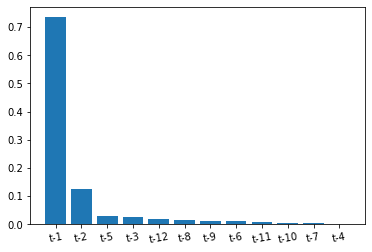

In [72]:
# Get feature importances from our random forest model
importances = rfr_reg.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3','t-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=10)
plt.show()

**GRADIENT BOOSTED TREE MODEL**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=9,
                                learning_rate=0.07,
                                n_estimators=100,
                                subsample=0.6,
                                random_state=33)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.9637228961918903
0.33692017907514304


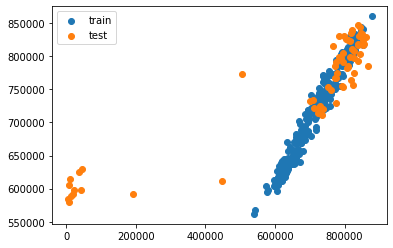

Tree on train set MAE%: 1.6
Tree on test set MAE%: 17.5


In [74]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

RsquareScoreTrain = gbr.score(train_feature, train_target)
RsquareScoreTest = gbr.score(test_feature, test_target)
result={'Model':'Gradient Boosted Tree (80|20)','Rsquare Train':[RsquareScoreTrain],'R-square Test':[RsquareScoreTest],'MAE Train':[round(MAE_train*100,1)],'MAE Test':[round(MAE_test*100,1)]}
result_80=result_80.append(pd.DataFrame(result), ignore_index=True)

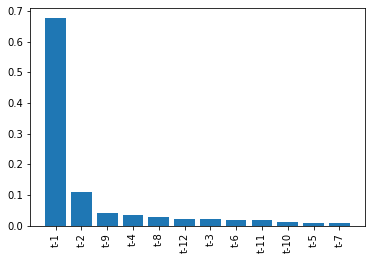

In [76]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x= range(X.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

**CONCLUSION**

In [77]:
result_80.sort_values(by=['Rsquare Train','R-square Test'], ascending=False)

,Model,Rsquare Train,R-square Test,MAE Train,MAE Test
2,Gradient Boosted Tree (80|20),0.963723,0.336920,1.6,17.5
1,Random Forest (80|20),0.937659,0.355570,2.1,17.1
0,Benchmark- Linear Regression(80|20),0.846835,0.927437,2.9,6.1


### LSTM

In [78]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [79]:
df

,passengers
date,
1992-01,680993
1992-02,671596
1992-03,652172
1992-04,664448
1992-05,661396
...,...
2020-09,19912
2020-10,23712
2020-11,38109


In [80]:
df1 = df.passengers.values
df1

array([680993, 671596, 652172, 664448, 661396, 655005, 632630, 645263,
       635089, 657180, 652792, 652631, 680624, 637601, 619690, 631010,
       671080, 655838, 668671, 675230, 687352, 702220, 696159, 689883,
       659580, 673810, 692518, 747242, 722560, 723419, 740604, 720137,
       739679, 696147, 738449, 669043, 723981, 715180, 759335, 732748,
       720242, 728333, 723955, 735197, 727527, 719331, 693215, 698165,
       694178, 718488, 746092, 736604, 738018, 786391, 749945, 741057,
       712931, 737315, 700088, 741850, 739955, 758712, 775433, 744327,
       720858, 729826, 731059, 728612, 738376, 740130, 735192, 754211,
       773300, 772207, 744877, 772550, 794304, 798606, 797289, 823774,
       805949, 818180, 840701, 809190, 704542, 815264, 803959, 793644,
       808461, 792468, 830120, 806699, 818688, 824227, 805964, 780793,
       775726, 790223, 789807, 798559, 813759, 789150, 780595, 776939,
       806131, 800410, 793227, 737678, 853896, 832749, 877510, 847173,
      

In [81]:
df1 = df1.reshape(-1,1)
df1

array([[680993],
       [671596],
       [652172],
       [664448],
       [661396],
       [655005],
       [632630],
       [645263],
       [635089],
       [657180],
       [652792],
       [652631],
       [680624],
       [637601],
       [619690],
       [631010],
       [671080],
       [655838],
       [668671],
       [675230],
       [687352],
       [702220],
       [696159],
       [689883],
       [659580],
       [673810],
       [692518],
       [747242],
       [722560],
       [723419],
       [740604],
       [720137],
       [739679],
       [696147],
       [738449],
       [669043],
       [723981],
       [715180],
       [759335],
       [732748],
       [720242],
       [728333],
       [723955],
       [735197],
       [727527],
       [719331],
       [693215],
       [698165],
       [694178],
       [718488],
       [746092],
       [736604],
       [738018],
       [786391],
       [749945],
       [741057],
       [712931],
       [737315],
       [700088

In [82]:
df1.dtype

dtype('int64')

In [83]:
# Scaling the data
scalar =MinMaxScaler()
df1=scalar.fit_transform(df1)

In [84]:
# Split into train and test
train = df1[:-49,:]
test = df1[-49:,:]

In [85]:
print(len(train), len(test))

300 49


In [86]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stemp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stemp-1):
        a = sequence[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stemp, 0])
    return np.array(dataX),  np.array(dataY)

In [87]:
time_stemp = 1

In [88]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stemp)
test_X, test_Y =create_data(test, time_stemp)

In [89]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [90]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

### Adam Optimiser

In [111]:
# Build the LSTM Model
model = tensorflow.keras.Sequential()
# Adding the input layer and LSTM layer
model.add(tensorflow.keras.layers.LSTM(50, activation= 'relu', input_shape =(1,1)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =5, verbose=2)



history = model.fit(train_X, train_Y, shuffle=True, epochs=5,validation_split=0.3, verbose=1, batch_size=10)

Epoch 1/5
21/21 [==============================] - 0s 9ms/step - loss: 0.7139 - val_loss: 0.5172
Epoch 2/5
21/21 [==============================] - 0s 3ms/step - loss: 0.6147 - val_loss: 0.4373
Epoch 3/5
21/21 [==============================] - 0s 3ms/step - loss: 0.5240 - val_loss: 0.3659
Epoch 4/5
21/21 [==============================] - 0s 5ms/step - loss: 0.4383 - val_loss: 0.2953
Epoch 5/5
21/21 [==============================] - 0s 4ms/step - loss: 0.3490 - val_loss: 0.2243


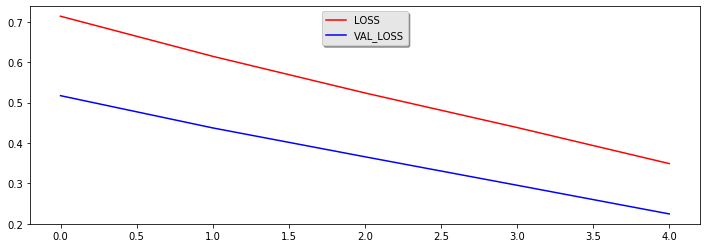

In [112]:
#plotting the graphs for loss and validation loss
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(history.history['loss'], color='red', label='LOSS')
plt.plot(history.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [117]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y_pred = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y_pred = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score1 = math.sqrt(mean_squared_error(train_Y_pred[0], train_predict[:,0]))
test_score1 = math.sqrt(mean_squared_error(test_Y_pred[0], test_predict[:,0]))

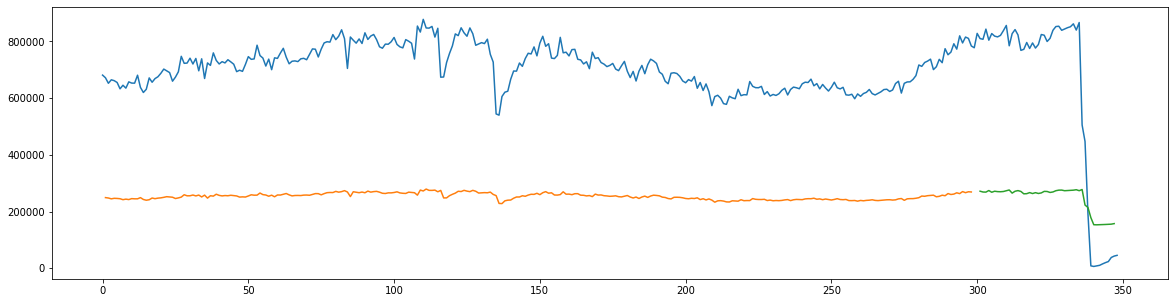

In [118]:
train_plot = np.empty_like(df1) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df1)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
fig = plt.figure(figsize=(20,5))
plt.plot(scalar.inverse_transform(df1))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()